# **Image Enhancement**
## Tugas Mata Kuliah: Computer Vision Lanjut
Risang Panggalih 24/550961/PPA/06961

## A. Histogram Equalization

Histogram equalization merupakan salah satu teknik pengolahan citra yang digunakan untuk meningkatkan kontras pada sebuah gambar. Histogram equalization bekerja dengan cara mendistribusikan intensitas pixel secara merata di rentang nilai intensitas (0 hingga 255).

In [27]:
# Import Library
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [28]:
# Define function

# Load citra sebagai array 2D
def load_img(path: str) -> np.ndarray:
    return np.array(Image.open(path).convert('L'), dtype=np.uint8)

# Mengubah array 2D menjadi citra PIL grayscale
def to_pil(arr: np.ndarray) -> Image.Image:
    return Image.fromarray(np.clip(arr, 0, 255).astype(np.uint8), mode='L')

# Menampilkan citra
def show(arr: np.ndarray, title: str = '') -> None:
    plt.figure()
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [29]:
# Fungsi Histogram Equalization
def histogram_equalization(img: np.ndarray) -> np.ndarray:
    if img.ndim != 2:
        raise ValueError("Fungsi hanya bisa menerima citra grayscale 2D (HxW)")

    hist = np.bincount(img.reshape(-1), minlength=256).astype(np.float64) # Hitung histogram 0..255
    cdf  = hist.cumsum() # CDF (Cumulative Distribution Function) = jumlah kumulatif dari histogram

    # Ambil nilai CDF terendah yang > 0 (Jika tidak ada maka cdf_min=0)
    cdf_min = cdf[np.nonzero(hist)][0] if hist.sum() > 0 else 0

    denom = img.size - cdf_min # total pixel-cdf_min

    # Jika denom <= 0 maka semua pixel sama (citra tidak perlu dinormalisasikan)
    if denom <= 0:
        return img.copy()

    # Normalisasi CDF ke rentang 0..255
    lut = np.round((cdf - cdf_min) * 255.0 / denom).astype(np.uint8)
    return lut[img]

Loaded: low-contrast.png


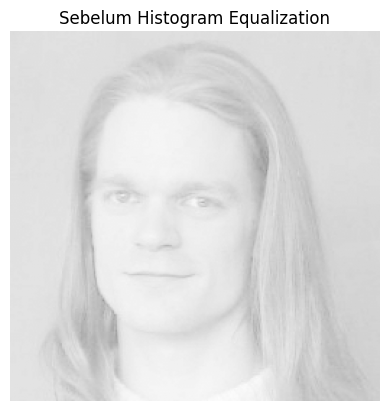

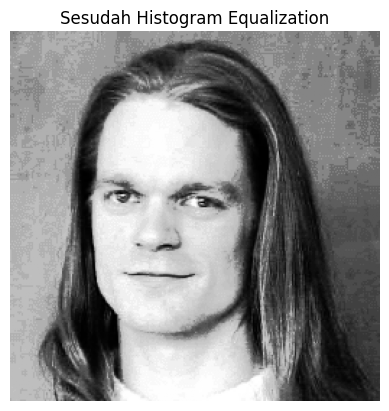

In [30]:
# Penerapan
IMG_PATH = "low-contrast.png"

low_contrast_img = load_img(IMG_PATH)
print(f"Loaded: {IMG_PATH}")
show(low_contrast_img, 'Sebelum Histogram Equalization')

show(histogram_equalization(low_contrast_img), 'Sesudah Histogram Equalization')

## B. Box Blur dan Unsharp Masking

Box blur merupakan teknik mengaburkan (smoothing) gambar dengan cara mengganti nilai setiap pixel dengan rata-rata dari pixel tetangganya. Unsharp masking merupakan teknik penajaman gambar (sharpening) dengan cara mengurangi blur dari gambar aslinya.

In [31]:
# Moving average 1 dimensi (blur)
def _movavg1d(a: np.ndarray, k: int) -> np.ndarray:
    if k % 2 == 0:
        raise ValueError("k harus bernilai ganjil (3, 5, 7, dll)")
    r = k // 2
    a_pad = np.pad(a.astype(np.float32), (r, r), mode='edge') # Menambahkan padding dengan cara mengulang nilai tepi (agar pinggir tidak gelap/terang)
    h = np.ones(k, dtype=np.float32) / k
    return np.convolve(a_pad, h, mode='valid') # Operasi Konvolusi

# Blur 2D dengan kernel rata-rata k×k
def box_blur(arr: np.ndarray, k: int = 3) -> np.ndarray:
    a = arr.astype(np.float32)
    if a.ndim != 2:
        raise ValueError("Fungsi hanya bisa menerima citra grayscale 2D (HxW)")
    tmp = np.apply_along_axis(_movavg1d, 1, a, k) # jalankan _movavg1d sepanjang axis 1 (horizontal)
    out = np.apply_along_axis(_movavg1d, 0, tmp, k) # jalankan _movavg1d sepanjang axis 0 (vertical)
    return out

def unsharp(arr: np.ndarray, k: int = 3, amount: float = 1.0) -> np.ndarray:
    blur = box_blur(arr, k) # Lakukan blur terlebih dahulu
    out = arr.astype(np.float32) + amount * (arr.astype(np.float32) - blur) # Unsharp masking (menajamkan gambar dengan menambahkan kembali detail dari perbedaan gambar asli dan hasil blur)
    return np.clip(out, 0, 255).astype(np.uint8)


Loaded: akmal.png


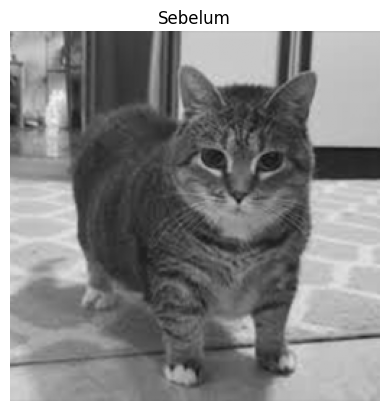

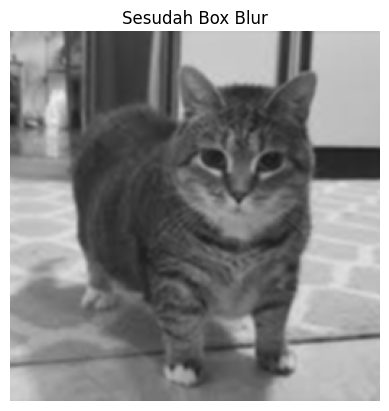

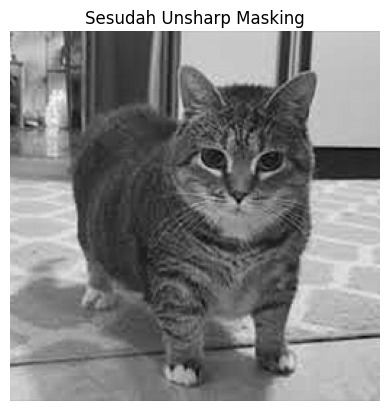

In [32]:
# Penerapan
IMG_PATH2 = "akmal.png"

cat_img = load_img(IMG_PATH2)

blurred_arr = box_blur(cat_img, k=5)
sharpened_arr = unsharp(cat_img, k=5, amount=1.2)

print(f"Loaded: {IMG_PATH2}")
show(cat_img, 'Sebelum')
show(box_blur(cat_img), 'Sesudah Box Blur')
show(unsharp(cat_img), 'Sesudah Unsharp Masking')